In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# dropping the ID column as it will not be useful in predicting our dependent variable
df.drop(columns='car_ID',inplace=True)

In [4]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Dimensions of dataframe

print("No. of rows: {}\t No. of columns: {}".format(*df.shape))

No. of rows: 205	 No. of columns: 25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [7]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


## Feature Engineering

In [8]:
# % of missing values
(df.isna().sum() / df.shape[0]) * 100

symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [9]:
# converting from numeric to categorical variable type
df["symboling"] = df["symboling"].astype(str)

In [10]:
# extracting make from the values
df["make"] = df['CarName'].str.split(' ', expand=True)[0]

In [11]:
# unique values in make
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
#Correcting the names

df["make"] = df["make"].replace({"maxda":"mazda",
                               "Nissan":"nissan",
                               "porcshce":"porsche",
                               "toyouta":"toyota",
                               "vokswagen":"volkswagen",
                               "vw":"volkswagen",
                                "alfa-romero":"alfa-romeo"})

In [13]:
# dropping the car name variable
df.drop(columns="CarName", inplace=True)

In [14]:
#Categorizing price into standard and high-end

df['price_category']=df['price'].apply(lambda x:'standard' if x<=18500 else 'high-end')


In [15]:
# creating list of numeric and categorical columns
col_numeric = list(df.select_dtypes(exclude="object"))

col_categorical = list(df.select_dtypes(include="object"))

## Exploratory Data Analysis

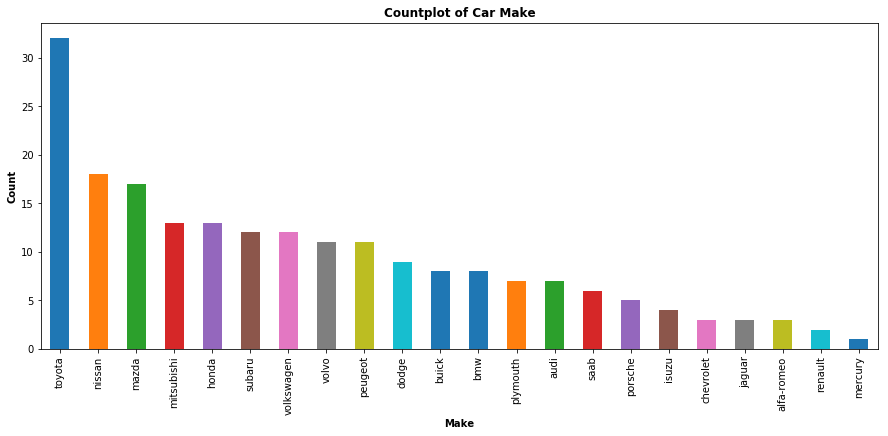

In [16]:
# visualizing the car make
plt.figure(figsize=(15,6))
df["make"].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Make", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("Countplot of Car Make", fontweight="bold")
plt.show()

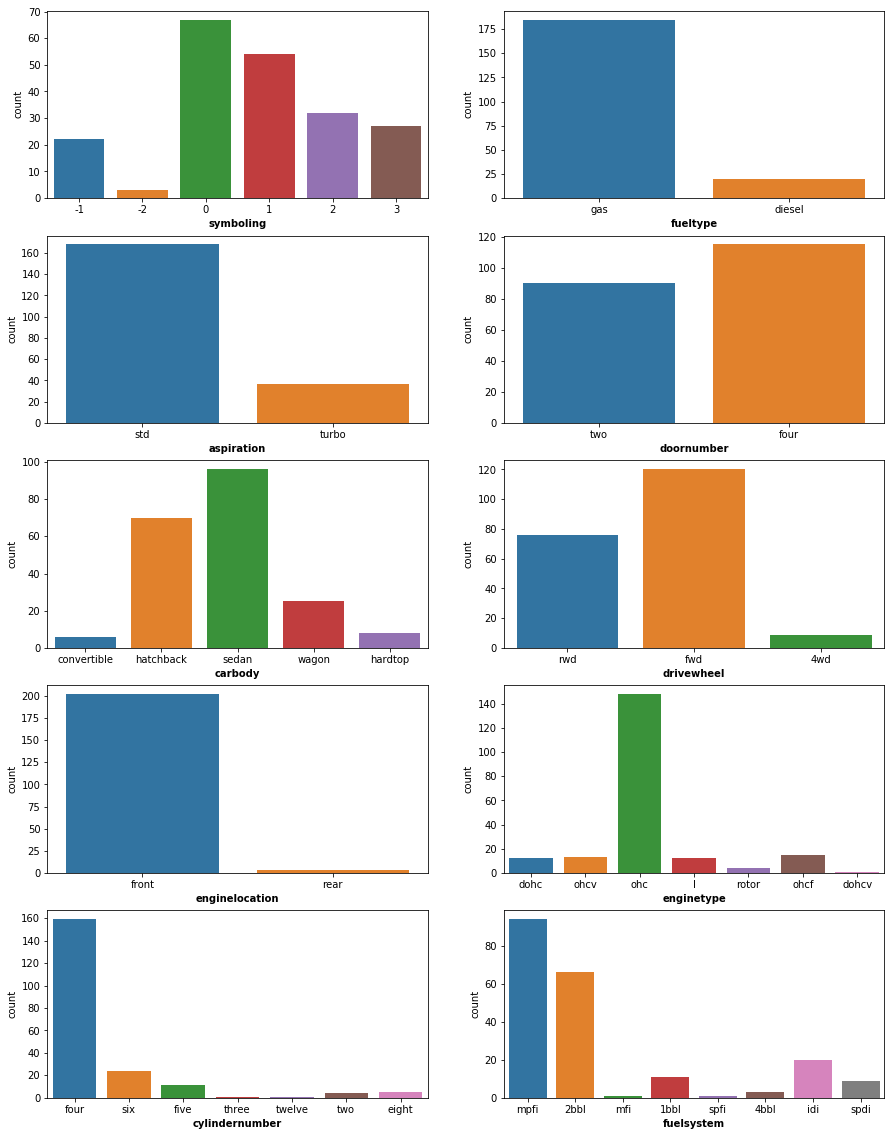

In [17]:
#Toyota seems to be the most favourite and Mercury seems to be the least favouite

# visualizing the other categorical variables
plt.figure(figsize=(15,20))
for i,col in enumerate(col_categorical[:-2], start=1):
    plt.subplot(5,2,i)
    sns.countplot(df[col])
    plt.xlabel(col, fontweight="bold")
plt.show()

Insights:

->symboling: A majority of auto makers are neither safe nor risky. Looks like there are more number of risky autos as compared to safe ones.


->fueltype: Majority of the automobiles are gas fuel type.


->aspiration: Majority of the automobiles use standard aspiration.


->doornumber: Majority of the automobiles are 4 door models.


->carbody: Sedan is the most common model, convertible is the least common model.


->drivewheel: Forward wheel drive is the most common model, 4 wheel drive is the least common model.


->enginelocation: Almost all the models are having engine location as front.


->enginetype: Majority (almost all) of the models are having 'ohc' engine type.


->cylindernumber: Majority (almost all) of the models are 4 cylinder models.


->fuelsystem: Majority of the models are having 'mpfi' and '2bbl' fuel systems.

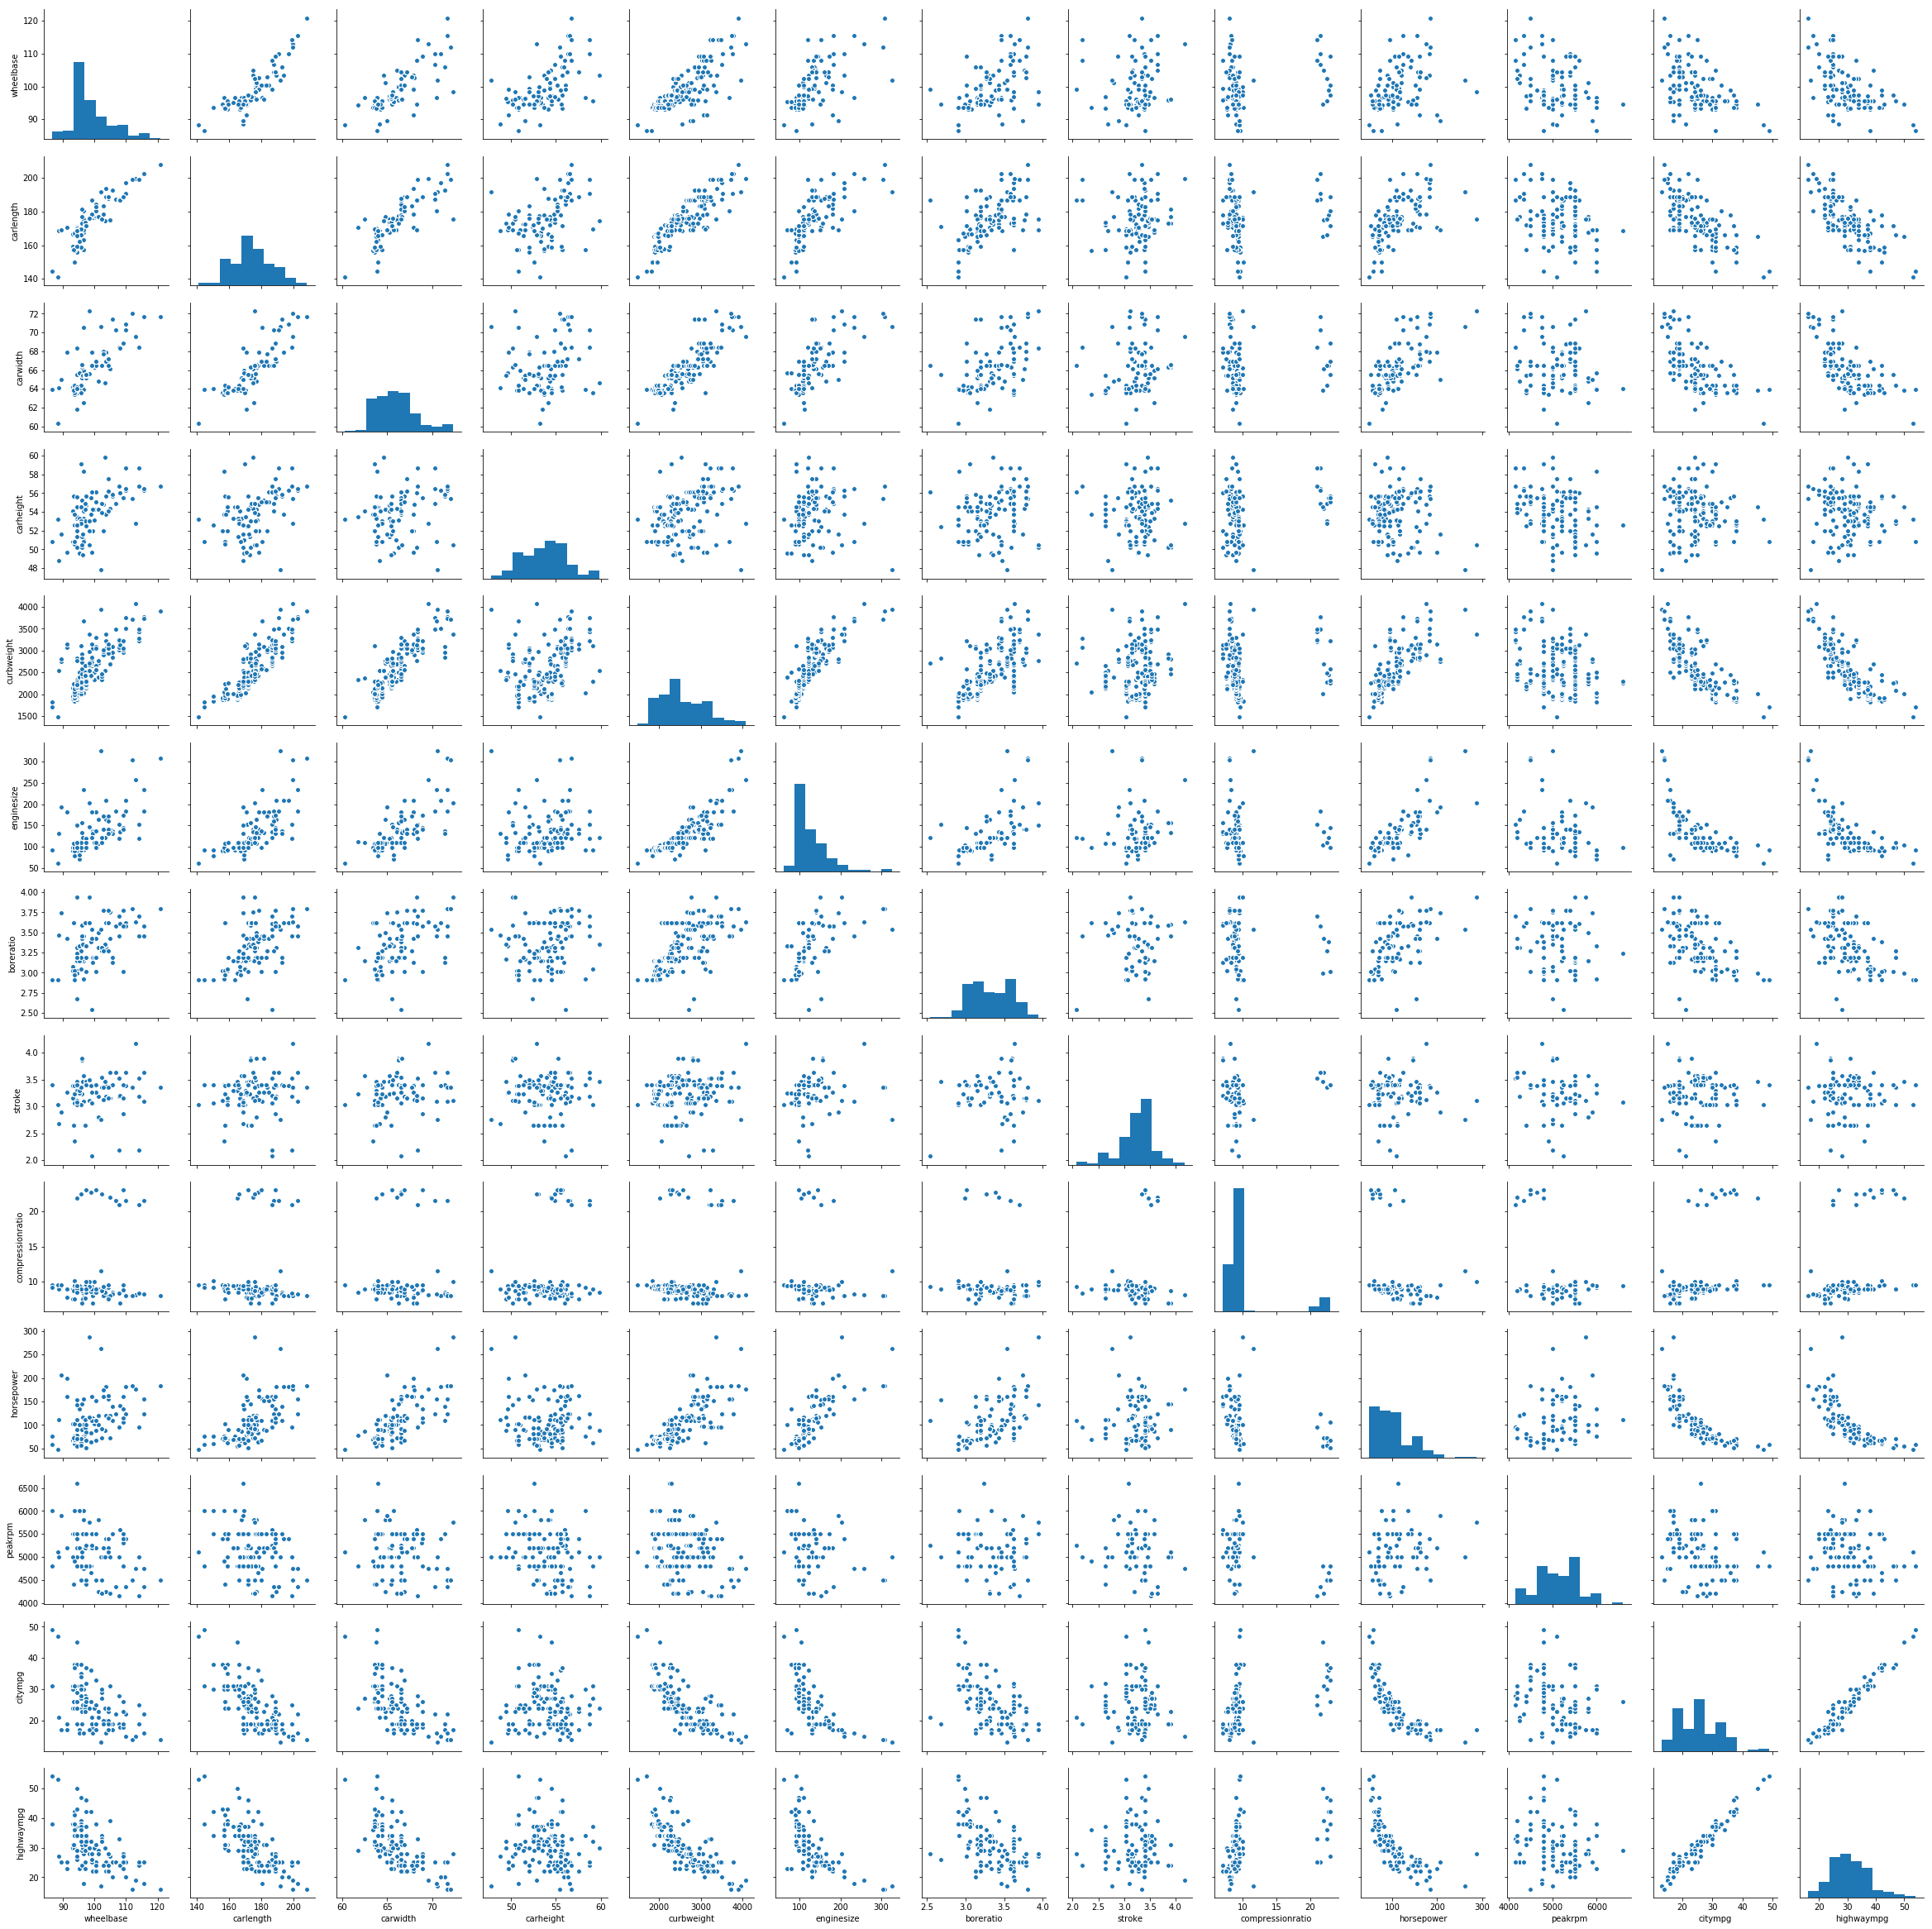

In [18]:
# pair plot to understand the correlation between the numeric variables (except price)
sns.pairplot(df[col_numeric[:-1]])
plt.show()

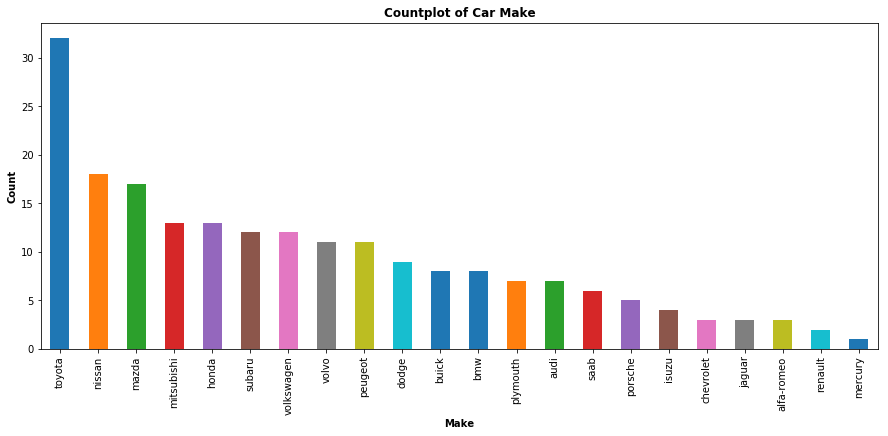

In [19]:
# visualizing the car make
plt.figure(figsize=(15,6))
df["make"].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Make", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("Countplot of Car Make", fontweight="bold")
plt.show()

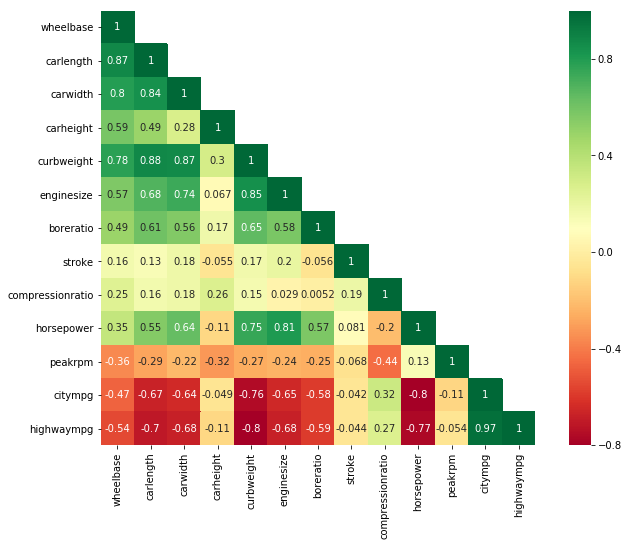

In [20]:
# heatmap to visualize the pearson's correlation matrix between the numeric variables (except price)
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns="price").corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(df.drop(columns="price").corr(), k=1))
plt.show()

Model specifications (wheelbase, carlenght, carweight, carheight, crubweight, enginesize, boreratio, stroke, compressionratio, horsepower) and performance metrics (peakrpm, citympg, highwaympg) are mostly negatively correlated.

C:\Users\Rishan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


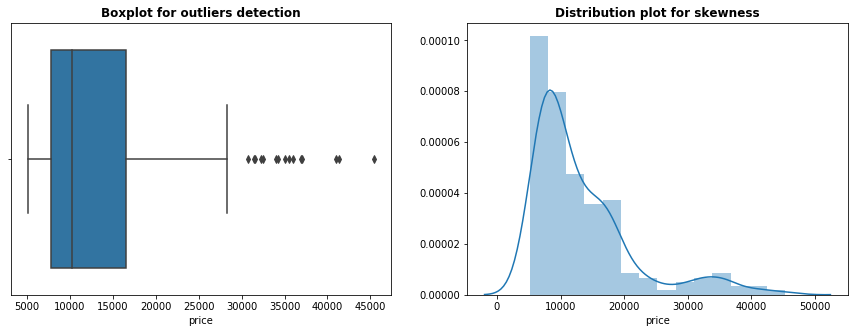

In [21]:
# visualizing our dependent variable for outliers and skewnwss
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(df["price"])
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1,2,2)
sns.distplot(df["price"])
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

There are few outliers towards the higher price range, suggesting that there are few high price models.

The distribution of price is right skewed, maybe we should think about applying transformation methods.


Most of the models are within 5000 and 18000 price range.

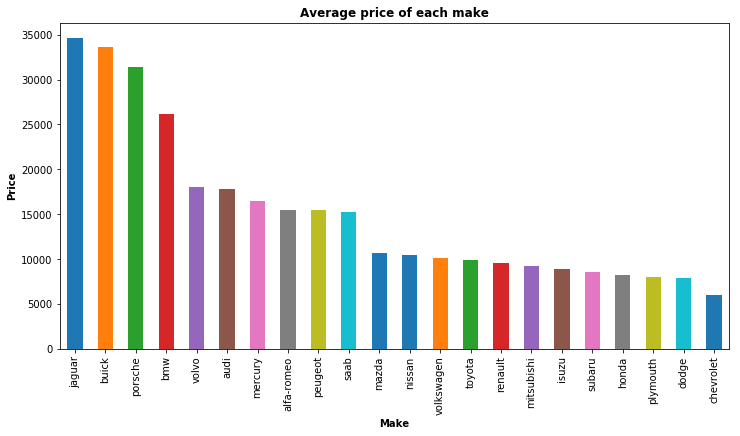

In [22]:
# average price of each make
df.groupby("make")["price"].mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.title("Average price of each make", fontweight="bold")
plt.ylabel("Price", fontweight="bold")
plt.xlabel("Make", fontweight="bold")
plt.show()

Jaguar has the highest average price.


Chevrolet make has the least average price.

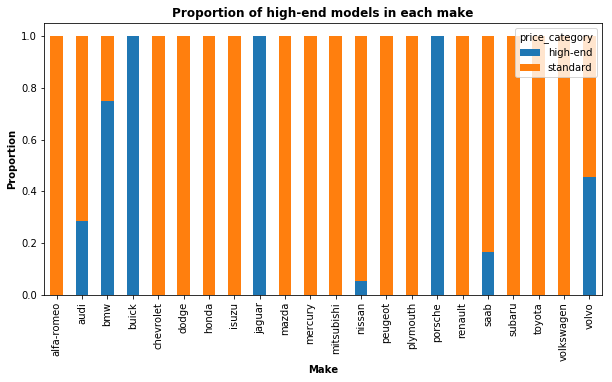

In [23]:
# proportion of high-end models in each make
pd.crosstab(df["make"], df["price_category"], normalize="index").plot.bar(stacked=True, figsize=(10,5))
plt.xlabel("Make", fontweight="bold")
plt.ylabel("Proportion", fontweight="bold")
plt.title("Proportion of high-end models in each make", fontweight="bold")
plt.show()

buick, jaguar and porsche have only high-end models.


bmw has 80% of their models as high-end.


volvo has equal proportion of high-end and standard price models.


audi, nissan and saab have less than 33% of models as high-end.


The rest (majority) of the car makers have only standard price models.

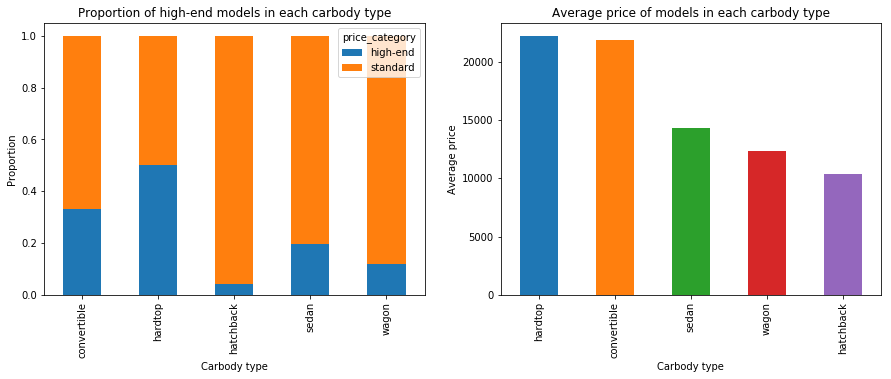

In [24]:
#price analysis for each carbody type

fig,ax=plt.subplots(1,2,figsize=(15,5))

pd.crosstab(df['carbody'],df['price_category'],normalize="index").plot.bar(stacked=True,ax=ax[0])
ax[0].set(xlabel="Carbody type", ylabel="Proportion", title="Proportion of high-end models in each carbody type")

df.groupby("carbody")["price"].mean().sort_values(ascending=False).plot.bar(ax=ax[1])
ax[1].set(xlabel="Carbody type", ylabel="Average price", title="Average price of models in each carbody type")

plt.show()

Hardtop and convertible have highest average price and also high proportion of high-end price models

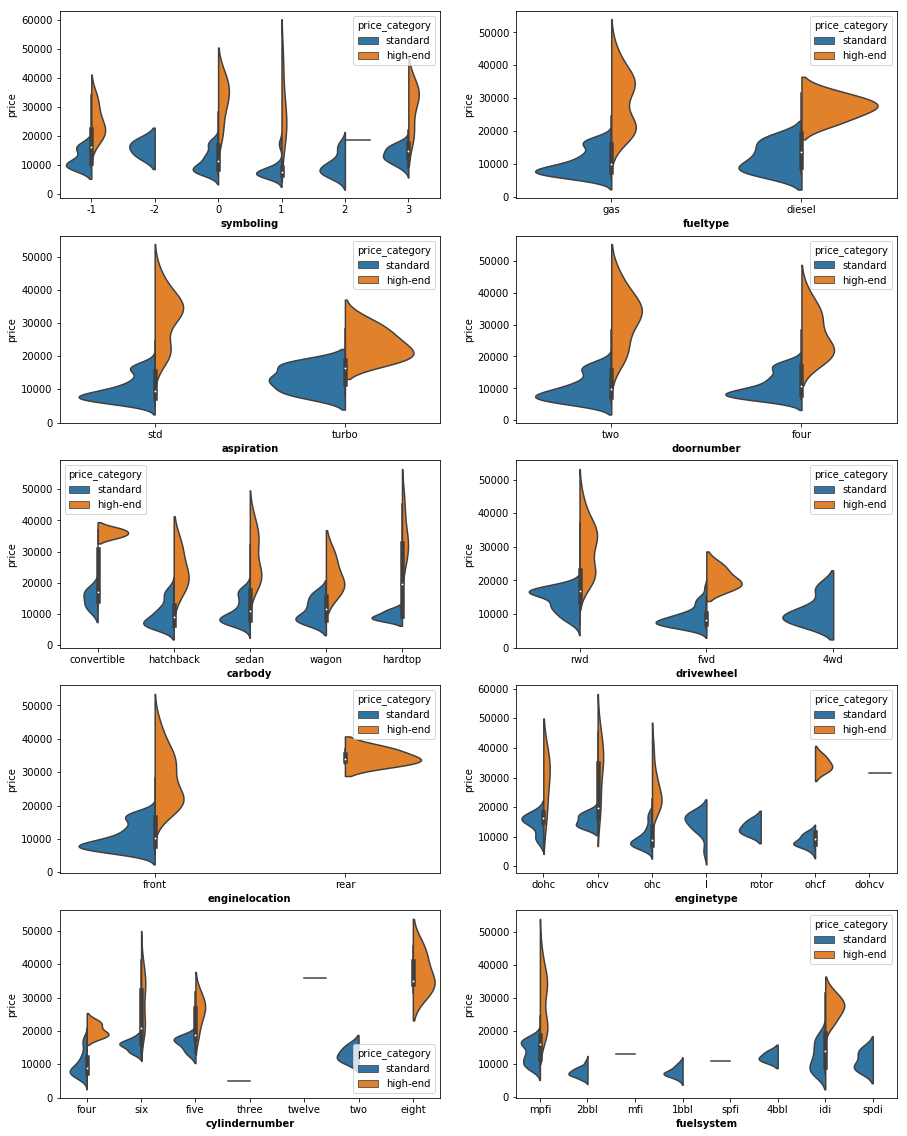

In [25]:
# visualizing distribution of price with the other categorical variables
plt.figure(figsize=(15,20))
for i,col in enumerate(col_categorical[:-2], start=1):
    plt.subplot(5,2,i)
    sns.violinplot(data=df, x=col, y="price", split=True, hue="price_category")
    plt.xlabel(col, fontweight="bold")
plt.show()

price and symboling, fueltype, doornumber, carbody doesn't seem to have much correlation.

Safest (symboling -2) seems to have only standard priced models.


price and drivewheel seems to have little correlation. All 4 wheel drive models are standard priced models.


price and enginelocation seems to have correlation. All the rear engine models are high-end models.


price and enginetype seems to have little correlation. While standard priced models are having all types of engines, high-
end models are having 'dohc', 'ohc', 'ohcv' and 'ohcf' engine types.


price and cylindernumber seems to have correlation. As the number of cylinders increases price of the model increases.


price and fuelsystem seems to have little correlation. High-end models are having only 'idi' and 'mpfi' fuel systems.

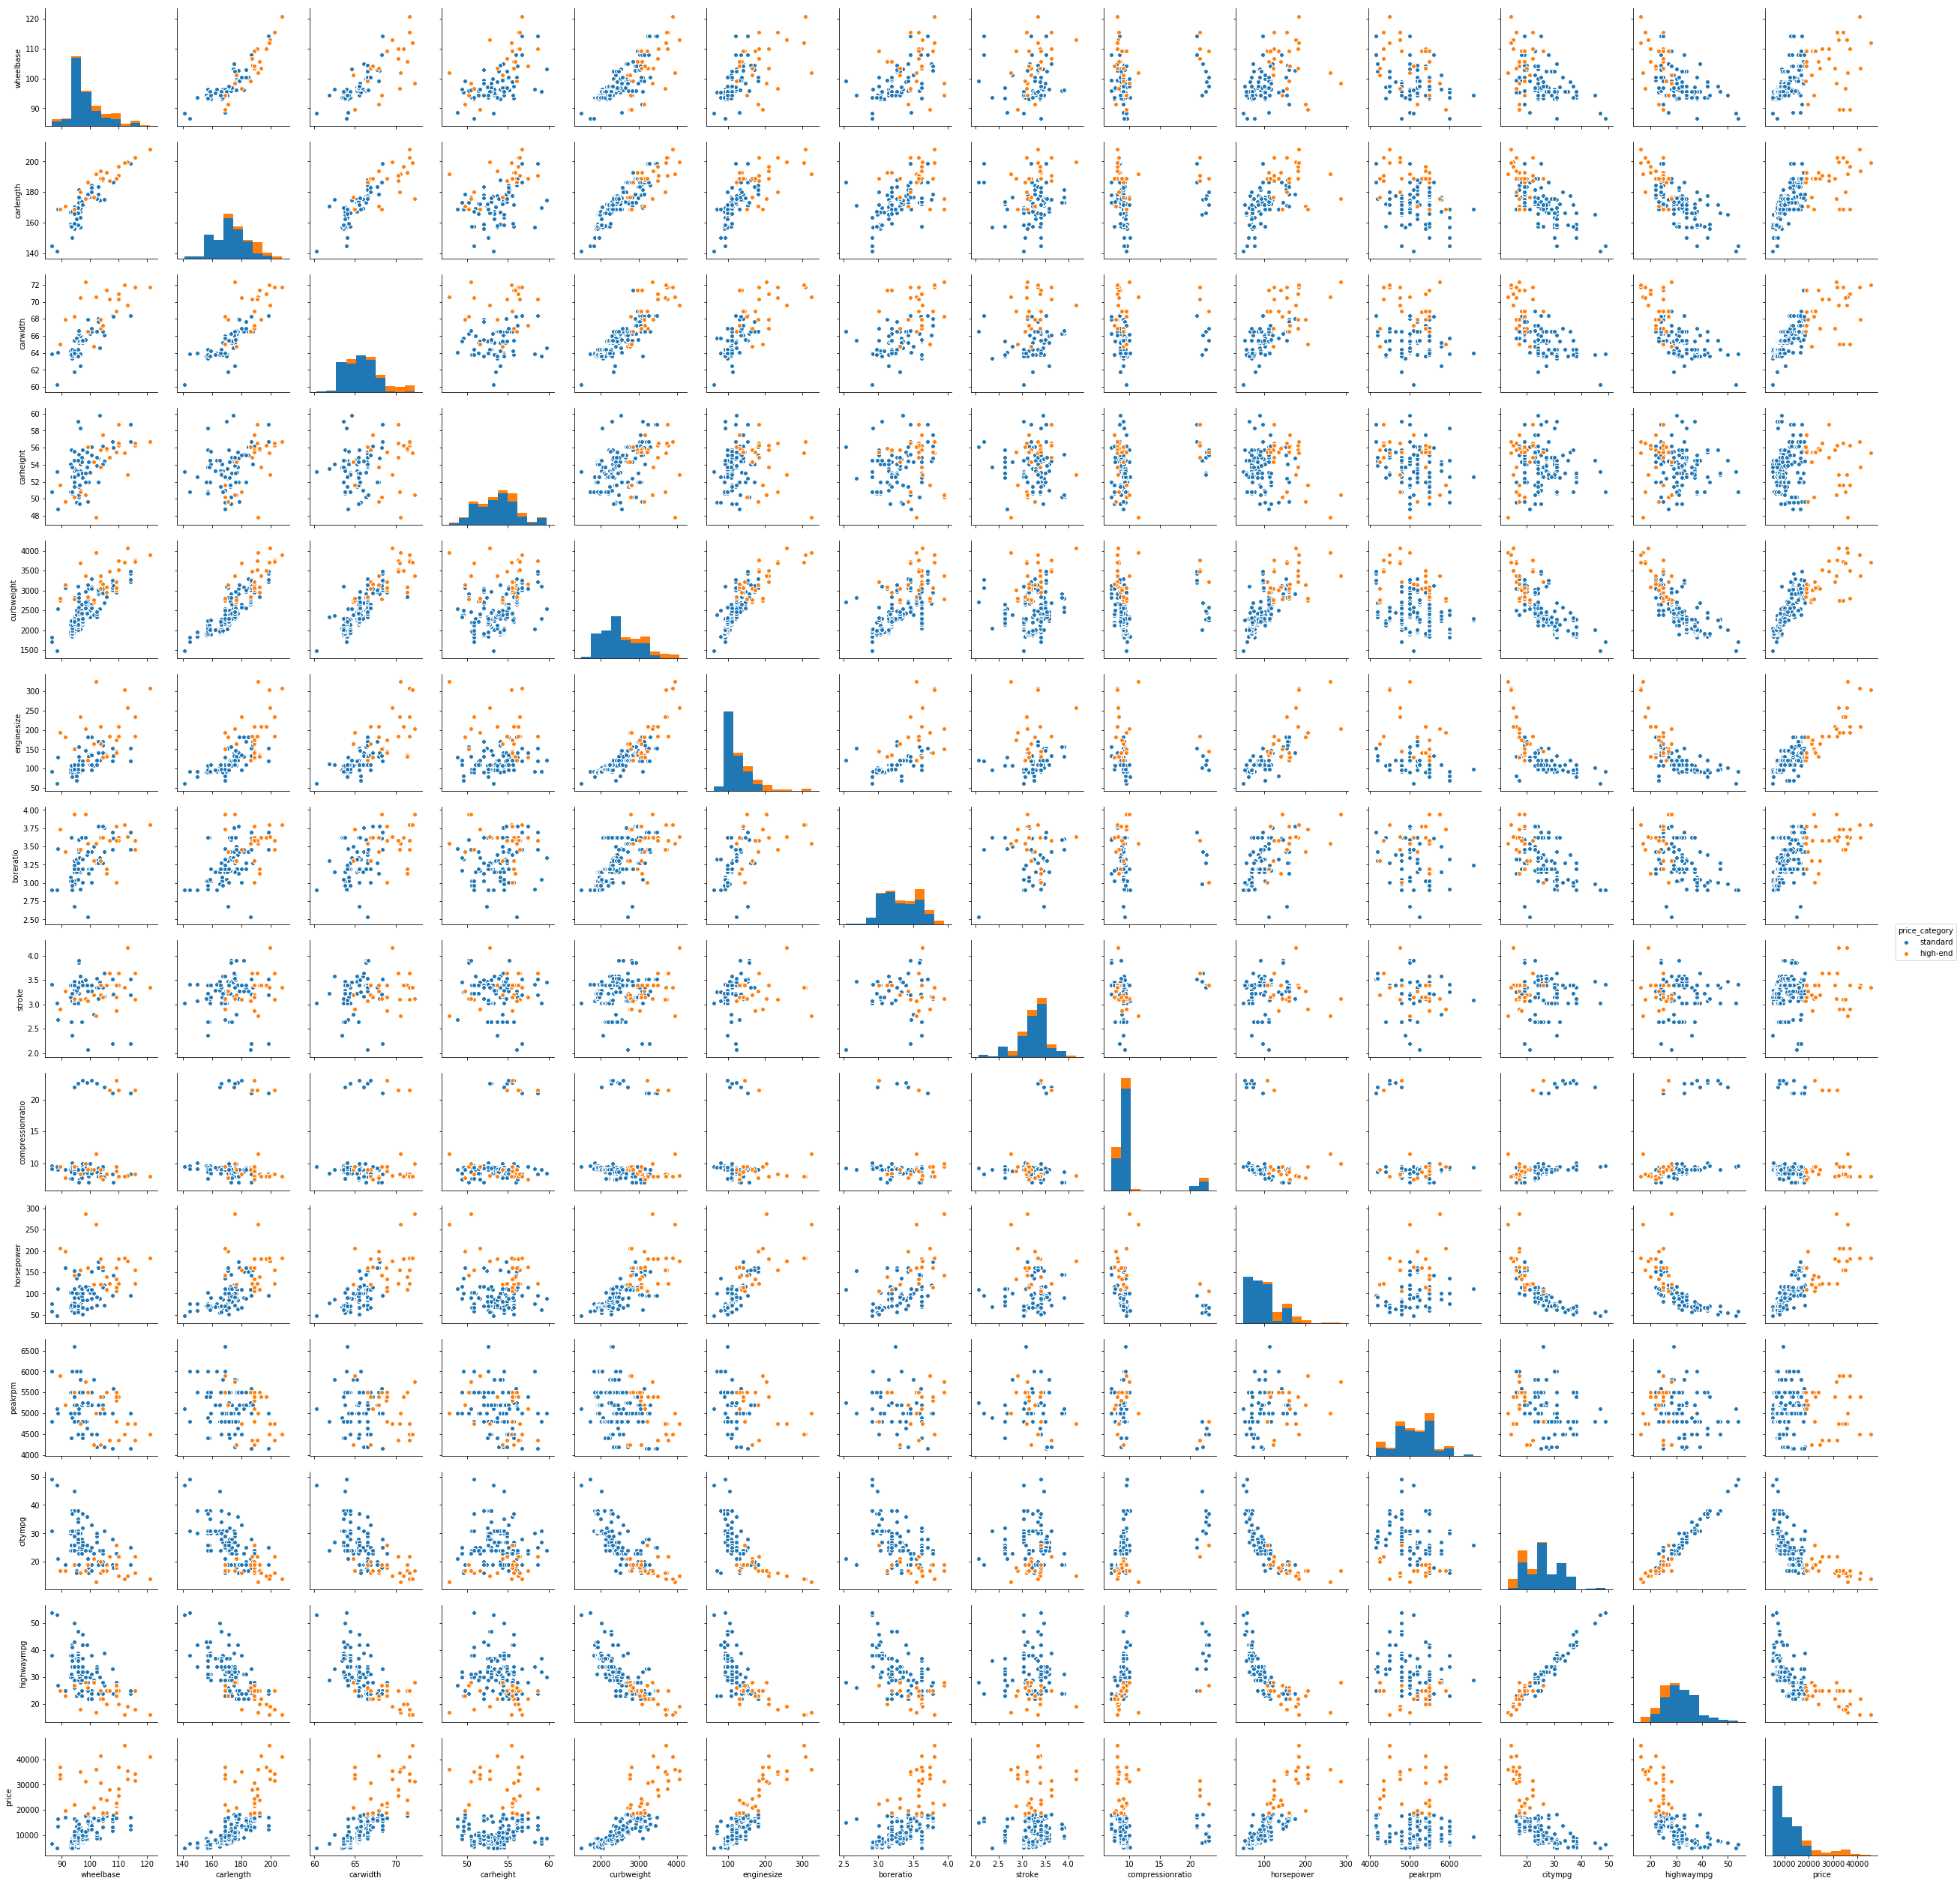

In [26]:
#visualizing distribution of price with continuous variables

col_numeric_pc=col_numeric.copy()
col_numeric_pc.append('price_category')
sns.pairplot(df[col_numeric_pc],hue="price_category")
plt.show()

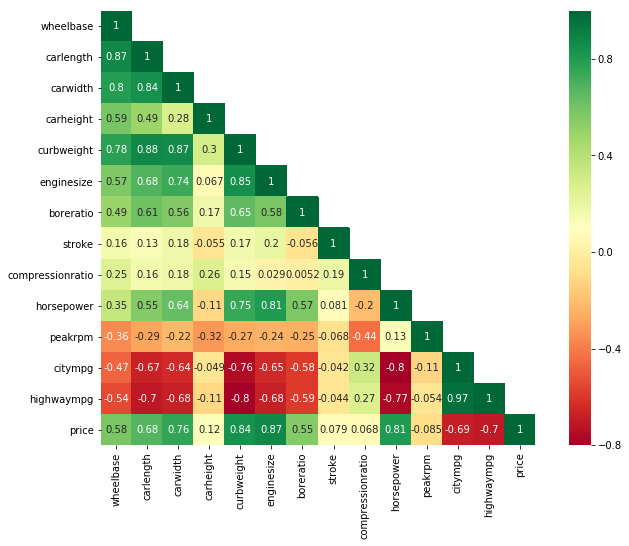

In [27]:
# heatmap to visualize the pearson's correlation between price and other the numeric variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(df.corr(), k=1))
plt.show()

price has high positive correlation with curbweight, enginesize, horsepower.


price has high negative correlation with mpg.

## Data Preparation


In [28]:
#Converting categorical variables into numeric¶

#Applying label encoding since I will be using a tree based model.

# converting categorical variables into numeric variables using label encoding
le = LabelEncoder()

df_encoded = df.drop(columns=["price_category"])
df_encoded[col_categorical[:-1]] = df_encoded[col_categorical[:-1]].apply(lambda col: le.fit_transform(col))

df_encoded.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,5,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,5,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,4,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [29]:
# independent variables
X = df_encoded.drop(columns="price")

# dependent variable
y = df_encoded["price"]

In [30]:
# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

## Decision Tree Regressor


In [31]:
#Decision Tree regressor
# building a base model
base_model = DecisionTreeRegressor()
base_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [32]:
# scoring using test data
y_pred = base_model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.925836592178034


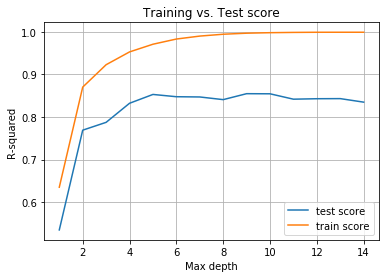

In [33]:
#Hyperparameter tuning

# hyperparameter tuning for best model
parameters = {"max_depth":list(range(1,15))}

base_model = DecisionTreeRegressor()
cv_model = GridSearchCV(estimator=base_model, param_grid=parameters, scoring='r2', return_train_score=True, cv=5).fit(X_train,y_train)

pd.DataFrame(cv_model.cv_results_)#[["mean_test_score","mean_train_score"]]

# train and test scores
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_test_score"], label="test score")
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_train_score"], label="train score")
plt.title("Training vs. Test score")
plt.ylabel("R-squared")
plt.xlabel("Max depth")
plt.legend()
plt.grid()
plt.show()

In [34]:
#There is no improvement in training score after max depth 8, so we build our model with max depth 8.

# building final model
model = DecisionTreeRegressor(max_depth=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.9194814089824253


## Random Forest Regressor

In [35]:
#Random Forest regressor
# building a base model
base_model = RandomForestRegressor()
base_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
# scoring using test data
y_pred = base_model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.938900022689983


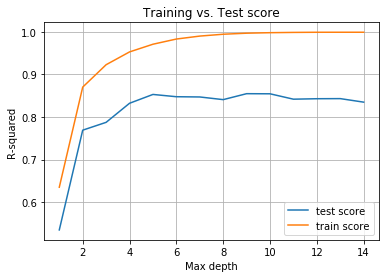

In [37]:
# train and test scores
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_test_score"], label="test score")
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_train_score"], label="train score")
plt.title("Training vs. Test score")
plt.ylabel("R-squared")
plt.xlabel("Max depth")
plt.legend()
plt.grid()
plt.show()

## KNN Regressor

In [38]:
#KNN Regressor
# building a base model
base_model = KNeighborsRegressor()
base_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [39]:
# scoring using test data
y_pred = base_model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.62475503099123


In [40]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 5
Best p: 1
Best n_neighbors: 3


In [41]:
#Hyper Parameter tuning

base_model = KNeighborsRegressor(algorithm='auto', leaf_size=5, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=1,
          weights='uniform')
base_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=5, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=1,
          weights='uniform')

In [42]:
# scoring using test data
y_pred = base_model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))



R-squared: 0.7487653369663312
